In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [4]:
df = pd.read_csv("../data/processed/aqi_clean.csv")


In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month

X = df[["PM2.5", "PM10", "NO2", "SO2", "CO", "O3", "Month"]]
y = df["AQI"]


In [8]:
scaler = joblib.load("../models/scaler.pkl")
X_scaled = scaler.transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)


In [20]:
print("Linear Regression Performance")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("RMSE:", mean_squared_error(y_test, lr_pred, squared=False))
print("R2 Score:", r2_score(y_test, lr_pred))


Linear Regression Performance
MAE: 29.825830495527804
RMSE: 54.48086871138714
R2 Score: 0.8071926826651342


C:\Users\MOKSHITH\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [24]:
print("Random Forest Performance")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("RMSE:", mean_squared_error(y_test, rf_pred, squared=False))
print("R2 Score:", r2_score(y_test, rf_pred))


Random Forest Performance
MAE: 20.546549674937015
RMSE: 42.41569610116517
R2 Score: 0.8831338702445402


C:\Users\MOKSHITH\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
## Model Comparison

- Linear Regression is used as a baseline model.
- Random Forest captures non-linear relationships between pollutants and AQI.
- Random Forest shows significantly better performance and is selected as the final model.


In [27]:
joblib.dump(rf, "../models/aqi_model.pkl")
print("✅ Final AQI model saved successfully")


✅ Final AQI model saved successfully


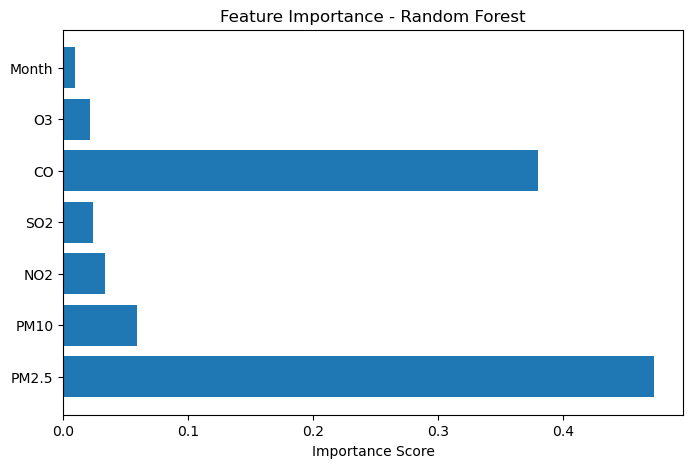

In [29]:
import matplotlib.pyplot as plt

feature_importance = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, feature_importance)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()


In [ ]:
## Model Training Summary

- Built baseline Linear Regression model
- Trained Random Forest Regressor for AQI prediction
- Random Forest achieved superior performance
- Saved trained model for production and deployment


In [31]:
def aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"


In [33]:
def health_advisory(category):
    advice = {
        "Good": "Air quality is satisfactory. Ideal for outdoor activities.",
        "Satisfactory": "Minor discomfort for sensitive individuals.",
        "Moderate": "Sensitive groups should limit prolonged outdoor exertion.",
        "Poor": "People with respiratory issues should avoid outdoor activities.",
        "Very Poor": "Avoid outdoor activities. Use masks if necessary.",
        "Severe": "Health alert! Everyone should stay indoors."
    }
    return advice[category]


In [35]:
sample_aqi = 245
cat = aqi_category(sample_aqi)
print(cat)
print(health_advisory(cat))


Poor
People with respiratory issues should avoid outdoor activities.
